In [1]:
import numpy as np
import matplotlib.pyplot as plt
import zwfs

In [2]:
WVL = 532e-9 # Nd:YAG
W0 = 5e-3 # 1U launch telescope
LAUNCH_DISTANCE = 43184 * 1e3 # km to meters
LAUNCH_ANGLE = 3.861 / 206265 # as to radians
LAUNCH_HEIGHT = LAUNCH_DISTANCE * LAUNCH_ANGLE

In [3]:
central_ray = np.array([0, # Height x
                        LAUNCH_HEIGHT, # Height y
                        0, # slope x
                        0]) # slopy y
k = 2 * np.pi / WVL

In [4]:
free = zwfs.free_space(LAUNCH_DISTANCE)
lens = zwfs.thin_lens(LAUNCH_DISTANCE)
abcd = free @ lens
central_ray_to_ep = abcd @ central_ray
qinv = zwfs.make_gaussian_qinv(WVL, W0)
qpinv = zwfs.gaussian_prop(qinv, abcd)

dx = np.linspace(-3,3,256)
dx, dy = np.meshgrid(dx, dx)
dcoords = np.array([dx.ravel(), dy.ravel()])
dcoords = np.swapaxes(dcoords, -1, 0)

# evaluate a gaussian
trans = zwfs.transversal_phase(qpinv, dcoords)
gauss = np.exp(-1j * k / 2 * trans)


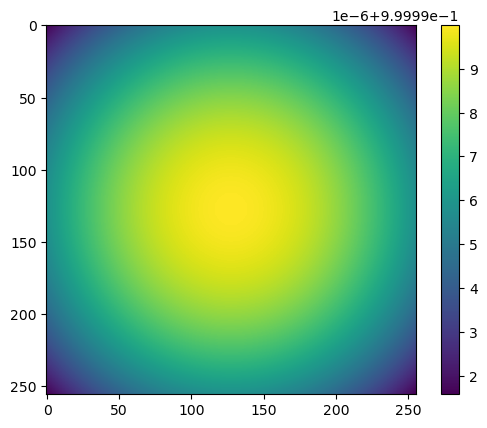

In [10]:
plt.imshow(np.abs(gauss.reshape([256, 256]))**2)
plt.colorbar()